In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
'''aca guardo los snaps en el formato h5py'''
import matplotlib.pyplot as plt
import pynbody
import h5py

G = 4.299e-6
#a0 = 1
#r200 = (189.977454324, 173.656484976, 137.617865798) este es el viejo r200 no le des bolilla
vector=(1,2,4)

halo1 = np.loadtxt('/z/dalgorry/datos_salida2/merger_tree-h1.dat')
v1 = halo1[:,2]
v1 = np.int_(v1)

halo2 = np.loadtxt('/z/dalgorry/datos_salida2/merger_tree-h2.dat')
v2 = halo2[:,2]
v2 = np.int_(v2)

halo3 = np.loadtxt('/z/dalgorry/datos_salida2/merger_tree-h3.dat')
v3 = halo3[:,2]
v3 = np.int_(v3)

snap = np.loadtxt('/z/dalgorry/snapshots.txt', dtype='string')
#len(snap)-1, 9
aux = 0

#for j in range(len(snap)-1, 0,-1):
for j in range(1, 0,-1):
    print 'snap', snap[j]
    
    output_file = h5py.File('../outputs2/snap_'+str('%s'%snap[j])+'.h5py', 'a')
   
    s=pynbody.load('/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'+str('%s'%snap[j])+'/WMAP3.CLUES.HR.00'+str('%s'%snap[j]))
    h = s.halos()
    
    time = s.properties['time'].in_units('Gyr')
    aexp = s.properties['a']
    hh = s.properties['h']
    omega_matter = s.properties['omegaM0']
    omega_lambda = s.properties['omegaL0']
    
    '''omega_matter = s.properties['omegaM0']
    omega_lambda = s.properties['omegaL0']
    
    hh = s.properties['h']
    H0 = 100.*hh/1e3
    
    z = (a0/aexp)-1.
    omega_cero = omega_matter + omega_lambda
    Ez = np.sqrt(omega_lambda + (1.-omega_cero)*(1.+z)**2. + omega_matter*(1+z)**3)
    H_z = H0*Ez
    
    rho_crit = (3*H_z**2)/(8*pi*G) #este es el rho critico (Msol/kpc^3)'''
    k=0
    for i in (v1[aux],v2[aux],v3[aux]):
        
        h1 = h[i]
    
        r200 = h1.properties['Rvir']

        cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True).in_units('kpc')
        
        #print '---------------------------------------------'
        #print 'halo', '%s'%vector[i]
        
        xstr=((h1.star['pos'].in_units('kpc'))[:,0] - cen_pot[0])
        ystr=((h1.star['pos'].in_units('kpc'))[:,1] - cen_pot[1])
        zstr=((h1.star['pos'].in_units('kpc'))[:,2] - cen_pot[2])
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)    
        kstr,=np.where(rstr<200)
        
        xgas=((h1.gas['pos'].in_units('kpc'))[:,0] - cen_pot[0])
        ygas=((h1.gas['pos'].in_units('kpc'))[:,1] - cen_pot[1])
        zgas=((h1.gas['pos'].in_units('kpc'))[:,2] - cen_pot[2])
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        kgas,=np.where(rgas<200)
    
        xdrk=((h1.dm['pos'].in_units('kpc'))[:,0] - cen_pot[0])
        ydrk=((h1.dm['pos'].in_units('kpc'))[:,1] - cen_pot[1])
        zdrk=((h1.dm['pos'].in_units('kpc'))[:,2] - cen_pot[2])
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
        kdrk,=np.where(rdrk<200)

        m_str = h1.star['mass'].in_units('Msol')
        m_gas = h1.gas['mass'].in_units('Msol')
        m_drk = h1.dm['mass'].in_units('Msol')
           
        vel_str=(h1.star['vel'].in_units('km s**-1'))
        vel_gas=(h1.gas['vel'].in_units('km s**-1'))
        vel_drk=(h1.dm['vel'].in_units('km s**-1'))
        
        '''#------calculamos el r200-------------
        #aca viene el calculo del r200, basicamente copie y pegue el codigo del
        #file que se llama radio_virial y lo meti aca
        
        rtot= concatenate([rstr,rgas,rdrk])
        mtot= concatenate([m_str, m_gas, m_drk])

        rtot_sort =np.sort(rtot)
        rtot_indice = np.argsort(rtot)

        Mc_tot = cumsum(mtot[rtot_indice])
    
        vol = (4/3)*pi*rtot_sort**3
        
        rho = Mc_tot/vol
        print 'rho', rho
        
        delta = rho/rho_crit
        delta_ = delta - 200
        
        print 'delta', delta
        print 'delta-200', delta_
        
        corte = np.where(delta_ < 0.0001)
    
        dd = delta[corte]
        rr =rtot_sort[corte]
        print 'radios', rr
        #el snap que trae problemas es el j=44 (snap 0784)
        #fijate que cuando construyo el vector rr que es el que contiene los r cuyos delta-200 < 0.0001
        #ese vector r me da vacio
        #incluso en los print del delta-200 a partir de ese snap la diferencia se hace cada vez mas grande
        #o sea nunca llega cerca de 200, no se que onda...
        
        r200 = rr[0]
        #----------------------------#'''
 
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Time', data=time)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/aexp', data=aexp)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/h', data=hh)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/OmegaM0', data=omega_matter)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/OmegaL0', data=omega_lambda)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/R200', data=r200)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Center', data=cen_pot)    # np.array([xc,yc,zc]))

        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Gas/Coordinates',    data=(h1.gas['pos'].in_units('kpc'))[kgas,:], dtype=np.float32)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Gas/Velocities',     data=vel_gas[kgas,:], dtype=np.float32)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Gas/Masses',         data=m_gas[kgas], dtype=np.float32)
#       output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Gas/Density',        data=rhogas[kgas], dtype=np.float32)
#       output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Gas/InternalEnergy', data=tempgas[kgas], dtype=np.float32)
#       output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Gas/Ids',            data=gas_id[kgas])

        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Drk/Coordinates',    data=(h1.dm['pos'].in_units('kpc'))[kdrk,:], dtype=np.float32)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Drk/Velocities',     data=vel_drk[kdrk,:], dtype=np.float32)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Drk/Masses',         data=m_drk[kdrk], dtype=np.float32)
#       output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Drk/Ids',            data=drk_id[kdrk])
 
        #if( (snap.npart[4] > 0) & (np.size(kstr) > 0) ):
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Str/Coordinates',    data=(h1.star['pos'].in_units('kpc'))[kstr,:], dtype=np.float32)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Str/Velocities',     data=vel_str[kstr,:], dtype=np.float32)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Str/Masses',         data=m_str[kstr], dtype=np.float32)
        output_file.create_dataset('/subhalo_'+str('%03d'%vector[k])+'/Str/FormationTime',  data=h1.star['tform'][kstr], dtype=np.float32)
        #output_file.create_dataset('/subhalo_'+str('%03d'% j)+'/Str/Ids',            data=str_id[kstr])
        k += 1
    aux += 1
print 'fin!'

snap 0112
fin!


In [5]:
import h5py
snap = h5py.File('../outputs2/snap_0112.h5py', 'r')
def printname(name):
    print name
snap.visit(printname)

subhalo_001
subhalo_001/Center
subhalo_001/Drk
subhalo_001/Drk/Coordinates
subhalo_001/Drk/Masses
subhalo_001/Drk/Velocities
subhalo_001/Gas
subhalo_001/Gas/Coordinates
subhalo_001/Gas/Masses
subhalo_001/Gas/Velocities
subhalo_001/OmegaL0
subhalo_001/OmegaM0
subhalo_001/R200
subhalo_001/Str
subhalo_001/Str/Coordinates
subhalo_001/Str/FormationTime
subhalo_001/Str/Masses
subhalo_001/Str/Velocities
subhalo_001/Time
subhalo_001/aexp
subhalo_001/h
subhalo_002
subhalo_002/Center
subhalo_002/Drk
subhalo_002/Drk/Coordinates
subhalo_002/Drk/Masses
subhalo_002/Drk/Velocities
subhalo_002/Gas
subhalo_002/Gas/Coordinates
subhalo_002/Gas/Masses
subhalo_002/Gas/Velocities
subhalo_002/OmegaL0
subhalo_002/OmegaM0
subhalo_002/R200
subhalo_002/Str
subhalo_002/Str/Coordinates
subhalo_002/Str/FormationTime
subhalo_002/Str/Masses
subhalo_002/Str/Velocities
subhalo_002/Time
subhalo_002/aexp
subhalo_002/h
subhalo_004
subhalo_004/Center
subhalo_004/Drk
subhalo_004/Drk/Coordinates
subhalo_004/Drk/Masses
subhal

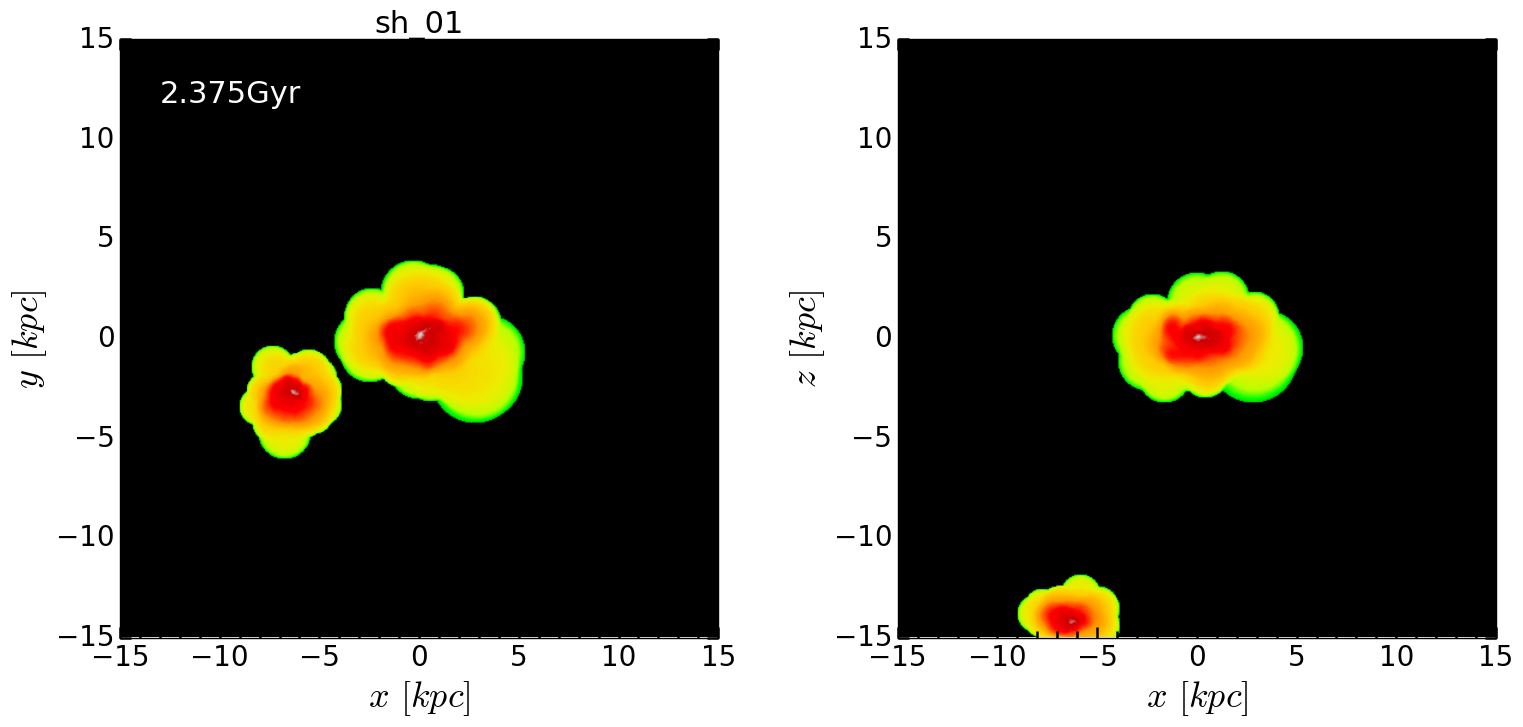

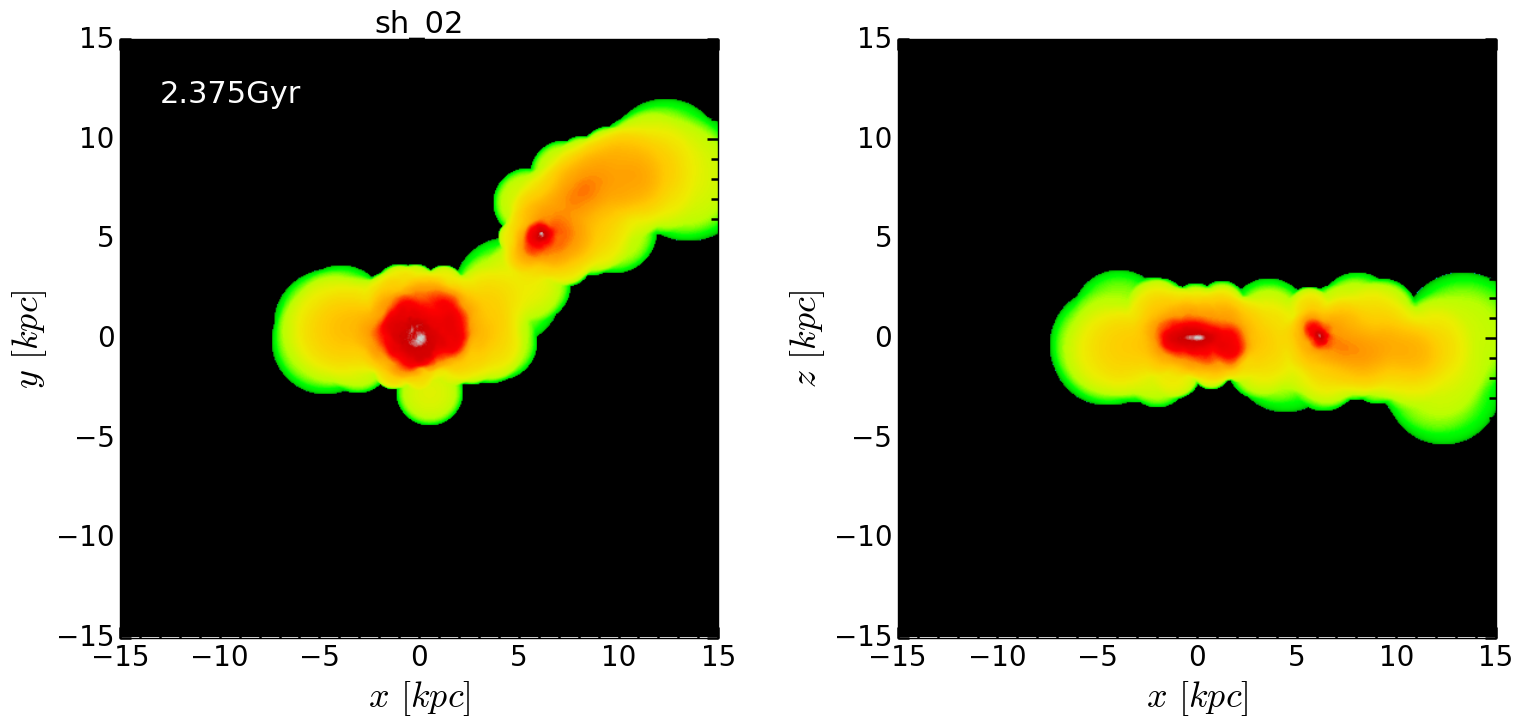

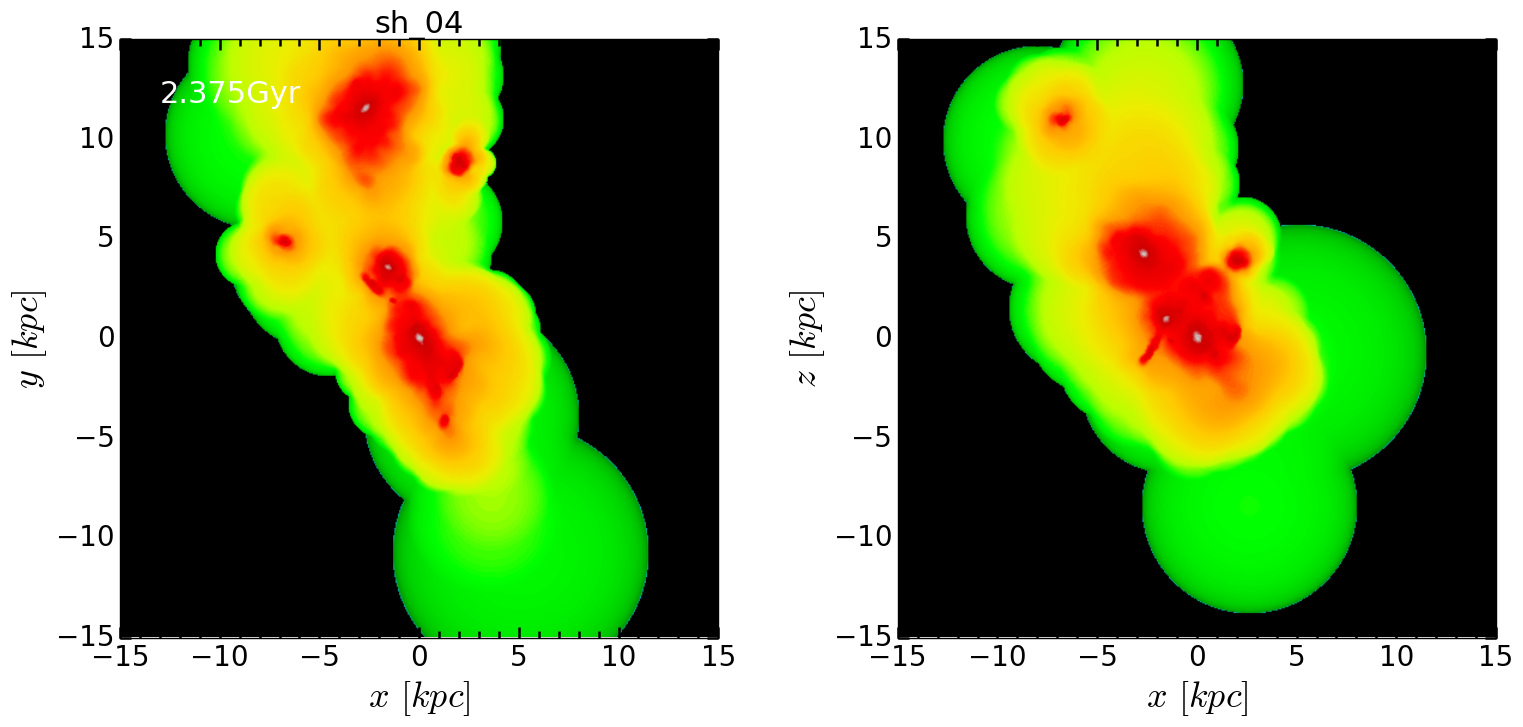

In [9]:
#Graficos de Densidad de las Estrellas

####PRUEBA PILOTO
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector=(1,2,4)
j=176
snap = h5py.File('../outputs2/snap_'+str('%04d'% j)+'.h5py', 'r')

for i in range(0,3):
    pstr = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Coordinates'].value
    cm   = snap['subhalo_00'+ str('%s'%vector[i]) +'/Center'].value
    vel  = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Velocities'].value
    masa = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Masses'].value
    r200 = snap['subhalo_00'+ str('%s'%vector[i]) + '/R200'].value
    time = snap['subhalo_00'+ str('%s'%vector[i]) + '/Time'].value

#---------paso las coordenadas respecto al centro de la galaxia-------
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r = np.sqrt(xstr**2+ystr**2+zstr**2)
    
#---------------masas------------------------------------------
    rgal=0.15*r200
        
    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])
    
    Mc = np.cumsum((masa[limit])[r_indice])
    
    Mgal = Mc[-1]
             
    razon = Mc/Mgal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)
     
    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
       
#----------componentes de la velocidad del centro de masa------------
    veloc,=np.where(r<r50[-1])

    vxcm = sum(masa[veloc]*vel[veloc,0])/sum(masa[veloc])
    vycm = sum(masa[veloc]*vel[veloc,1])/sum(masa[veloc])
    vzcm = sum(masa[veloc]*vel[veloc,2])/sum(masa[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm
        

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa,xstr,ystr,zstr,vx,vy,vz,r90[-1]) 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([3,np.size(xn)])
    pos[0,:]=xn
    pos[1,:]=yn
    pos[2,:]=zn

#---------------------generador del gráfico-----------------
    rl=15    
    corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))
         
#-----rango que tiene la escala  de colores-----
    vmin=0
    vmax=9
        
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='nipy_spectral'
    
#-----grafico-----------
    fig=plt.figure(1,figsize=(16,8))
    fig.subplots_adjust(bottom=0.08, left =0.09, right = 0.95, top = 0.95, wspace=0.3, hspace= 0.05)
        
    particles=sph.Particles(pos[:,corte],masa[corte]*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax1=fig.add_subplot(121)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
    #plt.axis('off')
    ax1.set_title('sh_0'+ str('%s'%vector[i]), fontsize=22)
    plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$y$'+' $[kpc]$', fontsize=26)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=20)
    ax1.tick_params('both', length=5, width=1.8,which='minor')
    ax1.tick_params('both', length=8, width=1.8,which='major')
    plt.text(-13, 13, str('%.3f'%time)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
                 #bbox={'facecolor':'black', 'alpha':1, 'pad':2})
        #plt.annotate("",xy=(30, -62), xycoords='data',xytext=(60, -62),textcoords='data',
        #              ha='center', va='center', 
        #             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=1.5))
        
        #plt.text(45, -62, '30 kpc', fontsize=15, color='white', ha='center', va='bottom')
        
        
    particles=sph.Particles(pos[:,corte],masa[corte]*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax2=fig.add_subplot(122)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
        #plt.axis('off')
    plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$z$'+' $[kpc]$', fontsize=26)
    ax2.minorticks_on()
    ax2.tick_params( labelsize=20)
    ax2.tick_params('both', length=5, width=1.8,which='minor')
    ax2.tick_params('both', length=8, width=1.8,which='major')
        #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
        

        #fig.savefig('/home/ornela/python/sem1/M31_3/'+str('%03d'%isnap)+'-sh0'+str('%s'%vector[i])+'.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
        #fig.savefig('/home/ornela/python/sem1/star2_'+str('%s'%vector[i])+'.png', dpi = 100)
    plt.show()
        #plt.clf()
        

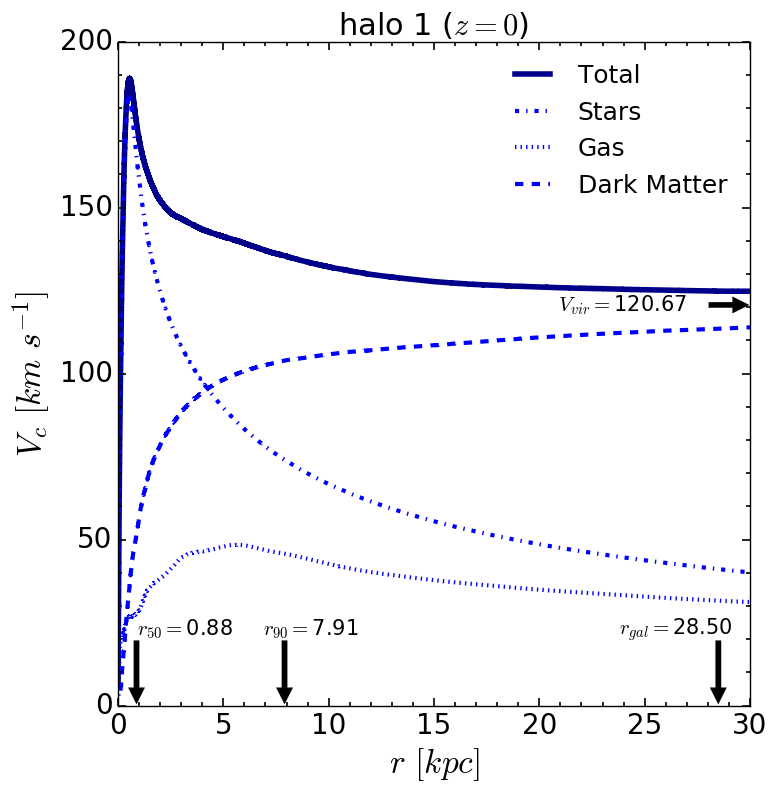

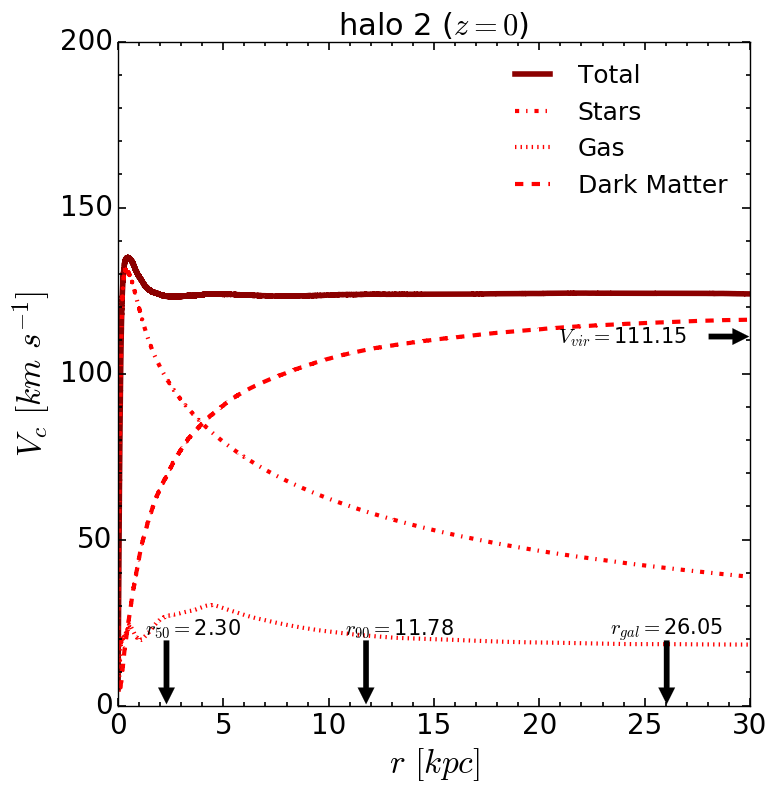

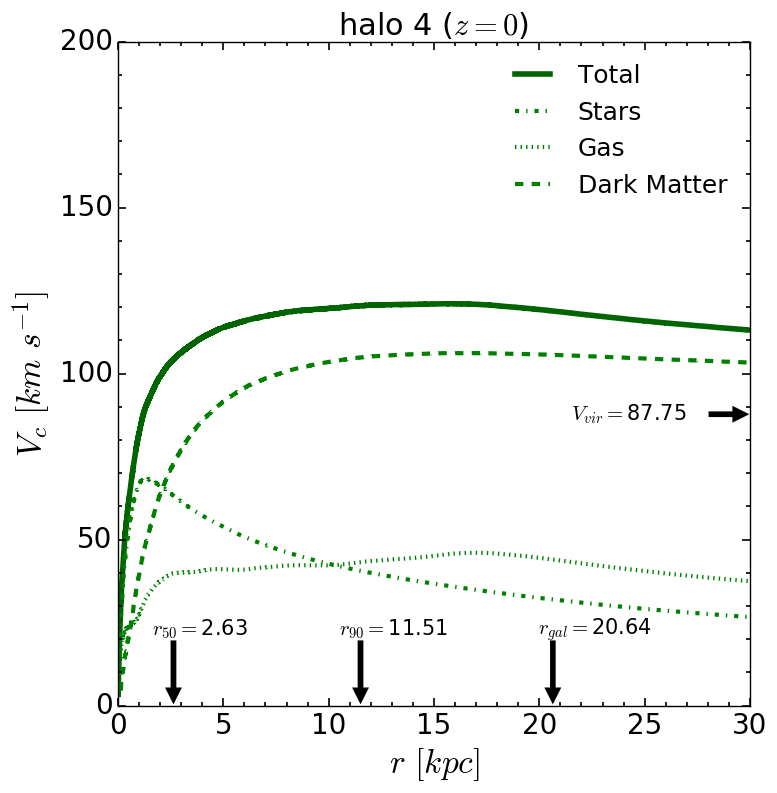

In [7]:
#Graficamos la veloc circular pero con la flecha de V200 y solo para los 3 halos mas grandes
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector=(1,2,4)
vector2 = ('b', 'r', 'g')
vector3 = ('darkblue', 'darkred', 'darkgreen')
h=0.732
G = 4.299e-6

j=1024
snap = h5py.File('../datos_salida/snap_'+str('%04d'% j)+'.h5py', 'r')
    
for i in range(0,3):
        
    pstr = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Coordinates'].value
    cm   = snap['subhalo_00'+ str('%s'%vector[i]) +'/Center'].value
    vel  = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Velocities'].value
    masa_str = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Masses'].value
    r200 = snap['subhalo_00'+ str('%s'%vector[i]) +'/R200'].value
        
    pgas = snap['subhalo_00'+ str('%s'%vector[i]) +'/Gas/Coordinates'].value
    masa_gas = snap['subhalo_00'+ str('%s'%vector[i]) +'/Gas/Masses'].value
        
    pdrk = snap['subhalo_00'+ str('%s'%vector[i]) +'/Drk/Coordinates'].value
    masa_drk = snap['subhalo_00'+ str('%s'%vector[i]) +'/Drk/Masses'].value
        
#----------coordenadas respecto al centro de la galaxia-----------------
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
        
#----------------------masas----------------------------  
    rgal=0.15*r200
        
    limit = np.where(rstr<rgal)
    r_sort = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])
        
    limit_str = np.where(rstr<r200)
    rstr_sort = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])
        
    limit_gas = np.where(rgas<r200)
    rgas_sort = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])
        
    limit_drk = np.where(rdrk<r200)
    rdrk_sort = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])
        
        
    Mgal_str = cumsum((masa_str[limit])[r_indice])
        
    Mc_str = cumsum((masa_str[limit_str])[rstr_indice])
        
    Mc_gas = cumsum((masa_gas[limit_gas])[rgas_indice])
        
    Mc_drk = cumsum((masa_drk[limit_drk])[rdrk_indice])
        
#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]
    
    razon = Mgal_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)
        
    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
#--------------------------------------------------------------       
    rtot= concatenate([rstr,rgas,rdrk])
    mtot= concatenate([masa_str, masa_gas, masa_drk])
        
    limit_tot = np.where(rtot<r200)
    rtot_sort = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])
        
    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
#--------------------------------------------------------------
    Mc_tot = Mc_tot[1:]
    Mc_str = Mc_str[1:]
    Mc_gas = Mc_gas[1:]
    Mc_drk = Mc_drk[1:]
    
    rtot_sort = rtot_sort[1:]
    rstr_sort = rstr_sort[1:]
    rgas_sort = rgas_sort[1:]
    rdrk_sort = rdrk_sort[1:]
    
    Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)
    
    Vvir = Vtot[-1]


#----------------------------------------------------------------------------------
    fig=plt.figure(i,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    total,= ax.plot(rtot_sort,Vtot,'-', lw=4, color='%s'%vector3[i], label= 'Total')
    stars,= ax.plot(rstr_sort,Vstr,'-.',lw=3, color='%s'%vector2[i], label ='Stars')
    gas,= ax.plot(rgas_sort,Vgas,':', color ='%s'%vector2[i],lw=3, label='Gas')
    drk,= ax.plot(rdrk_sort,Vdrk,'--',color='%s'%vector2[i], lw=3, label='Dark Matter')
    ax.set_title('halo '+str('%s'%vector[i])+' ($z = 0$)', fontsize= 22)
    plt.legend(handles=[total,stars,gas,drk],fontsize=18, frameon=False)
    plt.xlabel(u'$r$ $[kpc]$', fontsize=24)
    plt.ylabel(u'$V_c$ $[km$ $s^{-1}]$', fontsize=24)
    plt.ylim(0,200)
    plt.xlim(0,30)
    ax.minorticks_on()
    ax.tick_params( labelsize=20)
    ax.tick_params('both', length=3, width=1.2,which='minor')
    ax.tick_params('both', length=6, width=1.2,which='major')
    
    if i == 0:
        plt.annotate('', xy=(r50[-1],0), xytext=(r50[-1], 20), textcoords='data', 
                    arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
        plt.text(r50[-1], 23, '$r_{50} =$'+ '%.2f'%r50[-1], fontsize=15, color='black', ha='left', va='center')
    
    else:    
        plt.annotate('', xy=(r50[-1],0), xytext=(r50[-1], 20), textcoords='data', 
                    arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
        plt.text(r50[-1]-1, 23, '$r_{50} =$'+ '%.2f'%r50[-1], fontsize=15, color='black', ha='left', va='center')
    
    plt.annotate('', xy=(30,Vvir), xytext=(28, Vvir), textcoords='data', 
                arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="left", va='center')
    plt.text(27, Vvir, '$V_{vir} =$'+ str('%.2f'%Vvir), fontsize=15, color='black', ha='right', va='center')
    
    plt.annotate('', xy=(r90[-1],0), xytext=(r90[-1], 20), textcoords='data', 
                arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
    plt.text(r90[-1]-1, 23, '$r_{90} =$'+ '%.2f'%r90[-1], fontsize=15, color='black', ha='left', va='center')
    
    plt.annotate('', xy=(rgal,0), xytext=(rgal, 20), textcoords='data', 
                arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
    
    if i == 2:
        plt.text(rgal+2, 23, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=15, color='black', ha='center', va='center') 
    elif i == 1:
        plt.text(rgal, 23, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=15, color='black', ha='center', va='center')
    else:
        plt.text(rgal-2, 23, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=15, color='black', ha='center', va='center')

    plt.show()


In [10]:
snap = np.loadtxt('/z/dalgorry/snapshots.txt', dtype='string')
#for j in range(len(snap)-1,9,-1):
print snap[10:]

['0256' '0272' '0288' '0304' '0320' '0336' '0352' '0368' '0384' '0400'
 '0416' '0432' '0448' '0453' '0464' '0480' '0496' '0512' '0528' '0544'
 '0560' '0576' '0592' '0608' '0624' '0640' '0656' '0672' '0688' '0704'
 '0720' '0736' '0752' '0768' '0784' '0800' '0816' '0832' '0848' '0864'
 '0880' '0896' '0912' '0928' '0944' '0960' '0976' '0992' '1008' '1024']


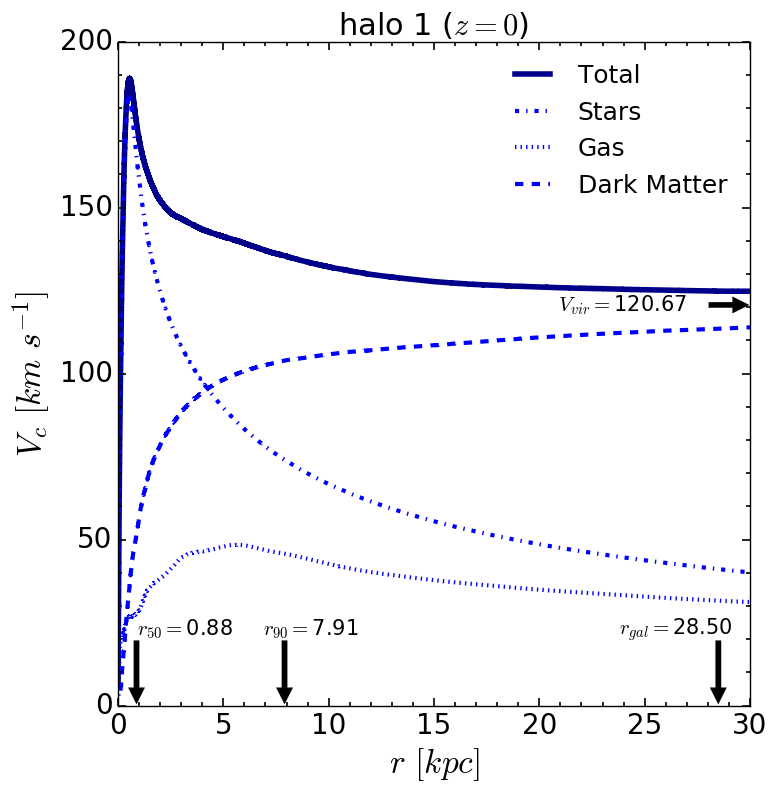

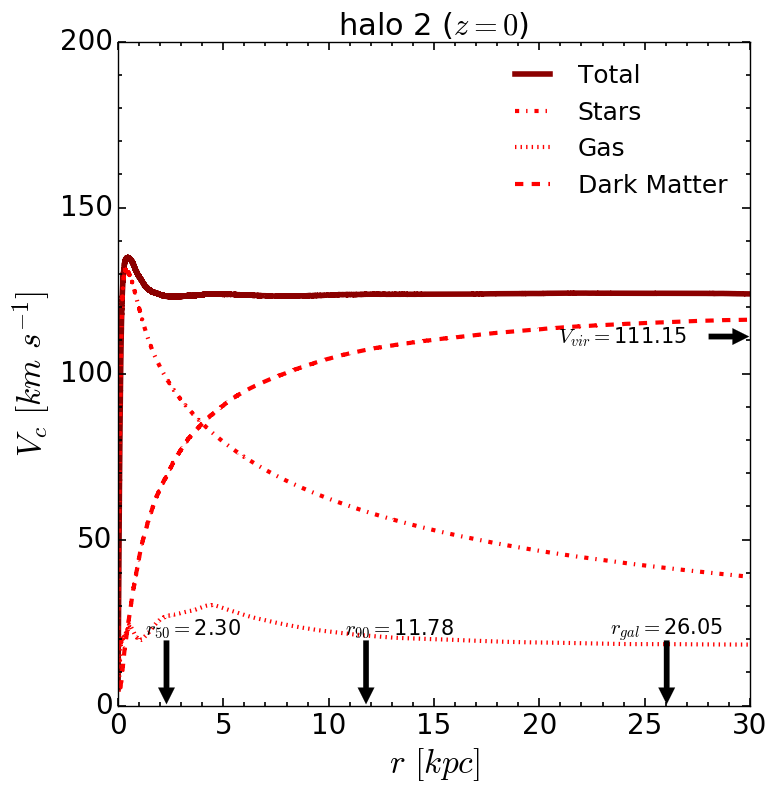

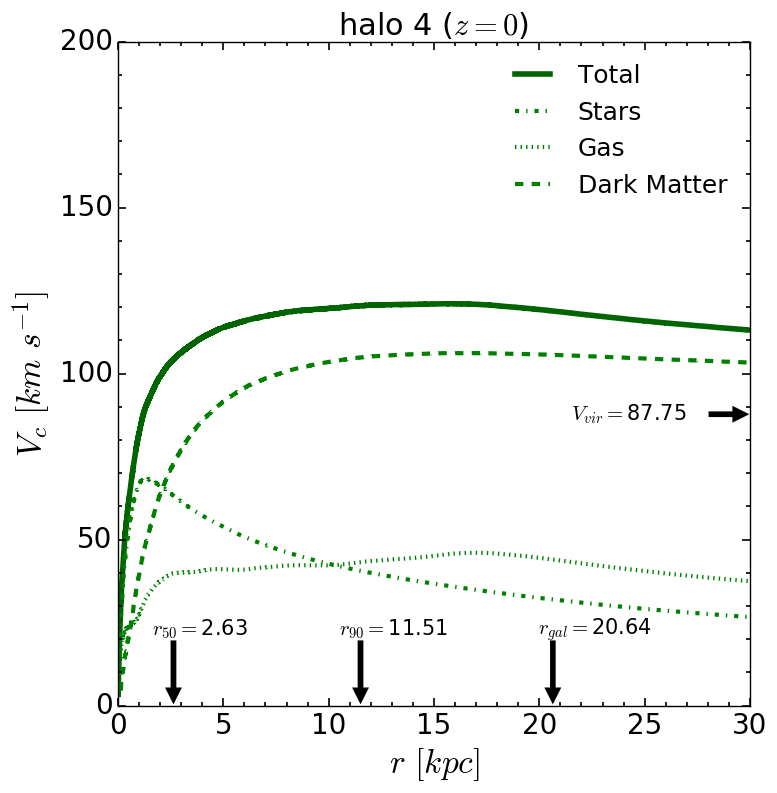

In [4]:
#Graficamos la veloc circular pero con la flecha de V200 y solo para los 3 halos mas grandes
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector=(1,2,4)
vector2 = ('b', 'r', 'g')
vector3 = ('darkblue', 'darkred', 'darkgreen')
h=0.732
G = 4.299e-6

j=1024
snap = h5py.File('../outputs/snap_'+str('%04d'% j)+'.h5py', 'r')
    
for i in range(0,3):
        
    pstr = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Coordinates'].value
    cm   = snap['subhalo_00'+ str('%s'%vector[i]) +'/Center'].value
    vel  = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Velocities'].value
    masa_str = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Masses'].value
    r200 = snap['subhalo_00'+ str('%s'%vector[i]) +'/R200'].value
        
    pgas = snap['subhalo_00'+ str('%s'%vector[i]) +'/Gas/Coordinates'].value
    masa_gas = snap['subhalo_00'+ str('%s'%vector[i]) +'/Gas/Masses'].value
        
    pdrk = snap['subhalo_00'+ str('%s'%vector[i]) +'/Drk/Coordinates'].value
    masa_drk = snap['subhalo_00'+ str('%s'%vector[i]) +'/Drk/Masses'].value
        
#----------coordenadas respecto al centro de la galaxia-----------------
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
        
#----------------------masas----------------------------  
    rgal=0.15*r200
        
    limit = np.where(rstr<rgal)
    r_sort = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])
        
    limit_str = np.where(rstr<r200)
    rstr_sort = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])
        
    limit_gas = np.where(rgas<r200)
    rgas_sort = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])
        
    limit_drk = np.where(rdrk<r200)
    rdrk_sort = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])
        
        
    Mgal_str = cumsum((masa_str[limit])[r_indice])
        
    Mc_str = cumsum((masa_str[limit_str])[rstr_indice])
        
    Mc_gas = cumsum((masa_gas[limit_gas])[rgas_indice])
        
    Mc_drk = cumsum((masa_drk[limit_drk])[rdrk_indice])
        
#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]
    
    razon = Mgal_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)
        
    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
#--------------------------------------------------------------       
    rtot= concatenate([rstr,rgas,rdrk])
    mtot= concatenate([masa_str, masa_gas, masa_drk])
        
    limit_tot = np.where(rtot<r200)
    rtot_sort = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])
        
    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
#--------------------------------------------------------------
    Mc_tot = Mc_tot[1:]
    Mc_str = Mc_str[1:]
    Mc_gas = Mc_gas[1:]
    Mc_drk = Mc_drk[1:]
    
    rtot_sort = rtot_sort[1:]
    rstr_sort = rstr_sort[1:]
    rgas_sort = rgas_sort[1:]
    rdrk_sort = rdrk_sort[1:]
    
    Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)
    
    Vvir = Vtot[-1]


#----------------------------------------------------------------------------------
    fig=plt.figure(i,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    total,= ax.plot(rtot_sort,Vtot,'-', lw=4, color='%s'%vector3[i], label= 'Total')
    stars,= ax.plot(rstr_sort,Vstr,'-.',lw=3, color='%s'%vector2[i], label ='Stars')
    gas,= ax.plot(rgas_sort,Vgas,':', color ='%s'%vector2[i],lw=3, label='Gas')
    drk,= ax.plot(rdrk_sort,Vdrk,'--',color='%s'%vector2[i], lw=3, label='Dark Matter')
    ax.set_title('halo '+str('%s'%vector[i])+' ($z = 0$)', fontsize= 22)
    plt.legend(handles=[total,stars,gas,drk],fontsize=18, frameon=False)
    plt.xlabel(u'$r$ $[kpc]$', fontsize=24)
    plt.ylabel(u'$V_c$ $[km$ $s^{-1}]$', fontsize=24)
    plt.ylim(0,200)
    plt.xlim(0,30)
    ax.minorticks_on()
    ax.tick_params( labelsize=20)
    ax.tick_params('both', length=3, width=1.2,which='minor')
    ax.tick_params('both', length=6, width=1.2,which='major')
    
    if i == 0:
        plt.annotate('', xy=(r50[-1],0), xytext=(r50[-1], 20), textcoords='data', 
                    arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
        plt.text(r50[-1], 23, '$r_{50} =$'+ '%.2f'%r50[-1], fontsize=15, color='black', ha='left', va='center')
    
    else:    
        plt.annotate('', xy=(r50[-1],0), xytext=(r50[-1], 20), textcoords='data', 
                    arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
        plt.text(r50[-1]-1, 23, '$r_{50} =$'+ '%.2f'%r50[-1], fontsize=15, color='black', ha='left', va='center')
    
    plt.annotate('', xy=(30,Vvir), xytext=(28, Vvir), textcoords='data', 
                arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="left", va='center')
    plt.text(27, Vvir, '$V_{vir} =$'+ str('%.2f'%Vvir), fontsize=15, color='black', ha='right', va='center')
    
    plt.annotate('', xy=(r90[-1],0), xytext=(r90[-1], 20), textcoords='data', 
                arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
    plt.text(r90[-1]-1, 23, '$r_{90} =$'+ '%.2f'%r90[-1], fontsize=15, color='black', ha='left', va='center')
    
    plt.annotate('', xy=(rgal,0), xytext=(rgal, 20), textcoords='data', 
                arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
    
    if i == 2:
        plt.text(rgal+2, 23, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=15, color='black', ha='center', va='center') 
    elif i == 1:
        plt.text(rgal, 23, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=15, color='black', ha='center', va='center')
    else:
        plt.text(rgal-2, 23, '$r_{gal} =$'+ str('%.2f'%rgal), fontsize=15, color='black', ha='center', va='center')

    plt.show()

In [16]:
#Graficos de Densidad de las Estrellas

####PRUEBA PILOTO
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector=(1,2,4)
j=256
snap = h5py.File('../outputs/snap_'+str('%04d'% j)+'.h5py', 'r')

for i in range(0,3):
    pstr = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Coordinates'].value
    cm   = snap['subhalo_00'+ str('%s'%vector[i]) +'/Center'].value
    vel  = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Velocities'].value
    masa = snap['subhalo_00'+ str('%s'%vector[i]) +'/Str/Masses'].value
    r200 = snap['subhalo_00'+ str('%s'%vector[i]) + '/R200'].value
    time = snap['subhalo_00'+ str('%s'%vector[i]) + '/Time'].value

#---------paso las coordenadas respecto al centro de la galaxia-------
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

#---------------masas------------------------------------------
    rgal=0.15*r200
       
    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])
    
    Mc = np.cumsum((masa[limit])[r_indice])

    Mgal = Mc[-1]
    
    razon = Mc/Mgal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)
     
    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
       
#----------componentes de la velocidad del centro de masa------------
    veloc,=np.where(r<r50[-1])

    vxcm = sum(masa[veloc]*vel[veloc,0])/sum(masa[veloc])
    vycm = sum(masa[veloc]*vel[veloc,1])/sum(masa[veloc])
    vzcm = sum(masa[veloc]*vel[veloc,2])/sum(masa[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm
        

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa,xstr,ystr,zstr,vx,vy,vz,r90[-1]) 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([3,np.size(xn)])
    pos[0,:]=xn
    pos[1,:]=yn
    pos[2,:]=zn

#---------------------generador del gráfico-----------------
    rl=15    
    corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))
         
#-----rango que tiene la escala  de colores-----
    vmin=0
    vmax=9
        
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='nipy_spectral'
    
#-----grafico-----------
    fig=plt.figure(1,figsize=(16,8))
    fig.subplots_adjust(bottom=0.08, left =0.09, right = 0.95, top = 0.95, wspace=0.3, hspace= 0.05)
        
    particles=sph.Particles(pos[:,corte],masa[corte]*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax1=fig.add_subplot(121)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
    #plt.axis('off')
    ax1.set_title('sh_0'+ str('%s'%vector[i]), fontsize=22)
    plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$y$'+' $[kpc]$', fontsize=26)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=20)
    ax1.tick_params('both', length=5, width=1.8,which='minor')
    ax1.tick_params('both', length=8, width=1.8,which='major')
    plt.text(-13, 13, str('%.3f'%time)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
                 #bbox={'facecolor':'black', 'alpha':1, 'pad':2})
        #plt.annotate("",xy=(30, -62), xycoords='data',xytext=(60, -62),textcoords='data',
        #              ha='center', va='center', 
        #             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=1.5))
        
        #plt.text(45, -62, '30 kpc', fontsize=15, color='white', ha='center', va='bottom')
        
        
    particles=sph.Particles(pos[:,corte],masa[corte]*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax2=fig.add_subplot(122)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
        #plt.axis('off')
    plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$z$'+' $[kpc]$', fontsize=26)
    ax2.minorticks_on()
    ax2.tick_params( labelsize=20)
    ax2.tick_params('both', length=5, width=1.8,which='minor')
    ax2.tick_params('both', length=8, width=1.8,which='major')
        #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
        

        #fig.savefig('/home/ornela/python/sem1/M31_3/'+str('%03d'%isnap)+'-sh0'+str('%s'%vector[i])+'.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
        #fig.savefig('/home/ornela/python/sem1/star2_'+str('%s'%vector[i])+'.png', dpi = 100)
    plt.show()
        #plt.clf()
        

IOError: Unable to open file (File signature not found)

In [20]:
print delta

[             inf   8.86505279e+08   2.70444683e+08 ...,   2.03863034e+02
   2.03856122e+02   2.03848197e+02]


In [7]:
print time

13.72956552
